<a href="https://colab.research.google.com/github/KarolineCostadaSilva/curso_fotografia_computacional/blob/main/Semana%201/Calculo_de_histograma_BGR_Gray_Clahe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos de histograma e equalização para imagens em tons de cinza e coloridas, assim como o uso do algoritmo CLAHE (Contrast Limited Adaptive Histogram Equalization)

Referências:

https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html

https://opencv-tutorial.readthedocs.io/en/latest/

![](https://drive.google.com/uc?id=11yPZPugxIgRTd1QmMO4y45Y9RObCOJ8o)

In [ ]:
#importar bibliotecas e realizar clone de imagens
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
if os.path.isdir("imgcourse"):
  print("Diretório já existe!")
else:
  !git clone https://github.com/mhsacampos/imgcourse

Diretório já existe!


![](https://drive.google.com/uc?id=16teg5zUQhl01IOgvnP61aFjj0kFrviwr)

#Código em Python/OpenCV para processamento de histograma para cada canal
Fonte: https://docs.opencv.org/3.4/d1/db7/tutorial_py_histogram_begins.html

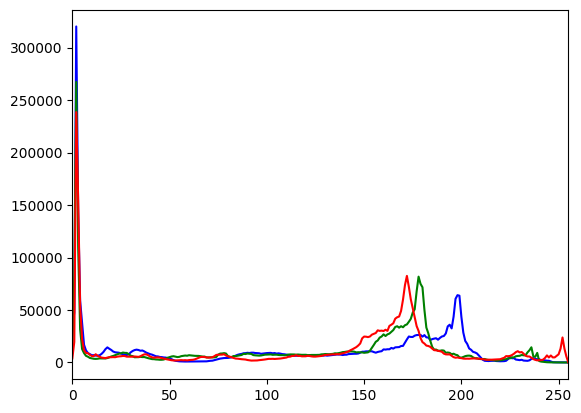

In [ ]:
imgcolor = cv2.imread("./imgcourse/Cubos_01.jpg")
assert imgcolor is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
#Syntax: cv.calcHist([img], channels, mask, bins, ranges)
for i,col in enumerate(color):
    histr = cv2.calcHist([imgcolor],[i],None,[256],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,255])
plt.show()

#Cálculo do histograma em cinza: da imagem principal e da subimagem (máscara)

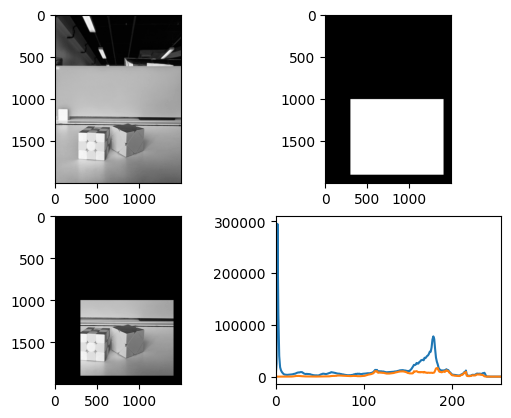

In [ ]:
img = cv2.imread('./imgcourse/Cubos_01.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[1000:1900, 300:1400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,255])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,255])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

#Visualização em 2D de histogramas para 2 canais simultaneamente

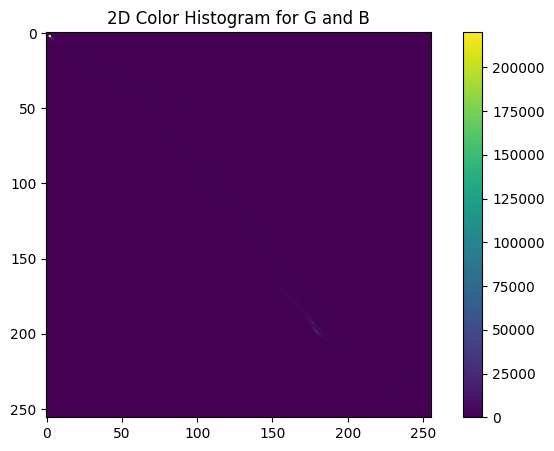

In [ ]:
# create a new figure and then plot a 2D color histogram for green and blue channels
fig = plt.figure(figsize=(28,5))
ax = fig.add_subplot(131)
chans = cv2.split(imgcolor) #lembrar a ordem dos canais em OpenCV: BGR
#Cálculo do histograma para o primeiro e segundo canais (B e G)
hist = cv2.calcHist([chans[0], chans[1]], [0, 1], None, [256, 256],[0, 255, 0, 255])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and G")
plt.colorbar(p)
plt.show()

#Equalização sobre o canal de intensidade, deixando os outros inalterados

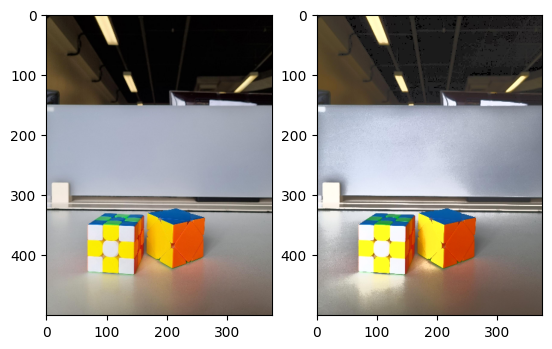

In [ ]:
def hisEqulColor(img): #equalização sobre o canal de luminância
    ycrcb=cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
    channels=cv2.split(ycrcb)
    # print(f"len(channels) = {len(channels)}")
    #Equalização sobre Y
    cv2.equalizeHist(channels[0],channels[0])
    #Recomposição dos canais para YCrCb
    cv2.merge(channels,ycrcb)
    #Conversão para BGR, formato do OpenCV
    cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2BGR,img)
    return img


imgcolor = cv2.imread("./imgcourse/Cubos_01.jpg")


Fx = 0.25; Fy = 0.25
image_resize = cv2.resize(imgcolor,  None, fx = Fx, fy = Fy, interpolation = cv2.INTER_CUBIC)
# cv2_imshow(image_resize)
img2=hisEqulColor(image_resize.copy())


img1 = cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.subplot(121), plt.imshow(img1)
plt.subplot(122), plt.imshow(img2)
plt.show()

#Equalização geral e com uso do algoritmo adaptativo  **CLAHE (Contrast Limited Adaptive Histogram Equalization)**

#Um tutorial para uso de CLAHE com OpenCV: https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

performed histogram equalization...
show CLAHE output image


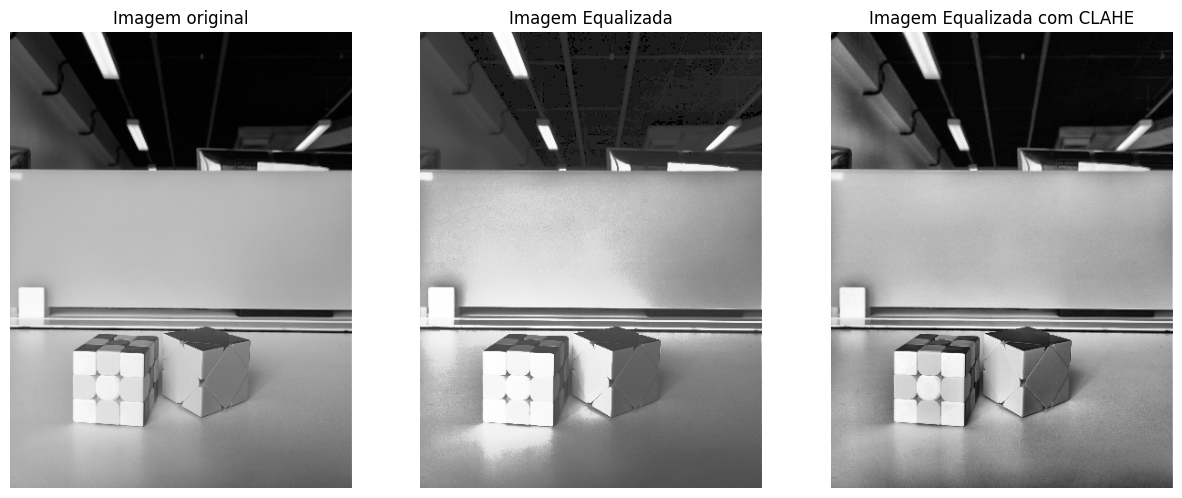

In [ ]:
gray = cv2.cvtColor(imgcolor,cv2.COLOR_BGR2GRAY)
Fx = 0.25; Fy = 0.25
image_resize = cv2.resize(gray,  None, fx = Fx, fy = Fy, interpolation = cv2.INTER_CUBIC)
gray = image_resize
# apply histogram equalization
print("performed histogram equalization...")
equalized1 = cv2.equalizeHist(gray)


# apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
# print("applying CLAHE...")
args = {'gray': './imgcourse/Cubos_01.jpg','clip': 2.0,'tile': 8}
clahe = cv2.createCLAHE(clipLimit=args["clip"],tileGridSize=(args["tile"], args["tile"]))
equalized = clahe.apply(gray)
#applying CLAHE...
print("show CLAHE output image")
# cv2_imshow(equalized)


f, axes = plt.subplots(1, 3, figsize=(15,18))

az1 = plt.subplot(131)
az1.title.set_text('Imagem original')
plt.imshow(gray,'gray')

plt.axis('off')
az2 = plt.subplot(132)
az2.title.set_text('Imagem Equalizada')
plt.imshow(equalized1,'gray')
plt.axis('off')

az3 = plt.subplot(133)
az3.title.set_text('Imagem Equalizada com CLAHE')
plt.imshow(equalized,'gray')
plt.axis('off')
plt.show()

